<a href="https://colab.research.google.com/github/maryamfatimaJ/netflix-shows-eda/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "netflix_titles.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shivamb/netflix-shows",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


/tmp/ipython-input-2174196122.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 1.34M/1.34M [00:00<00:00, 88.9MB/s]

Extracting zip of netflix_titles.csv...


### Explore & Understand the Data

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


###Handling missing values

In [10]:
#Now handling missing values
df['director'] = df['director'].fillna("unknown")

In [15]:
df['cast'] = df['cast'].fillna("unknown")

In [16]:
df['country'] = df['country'].fillna("Not Available")

In [17]:
df['date_added'].fillna("Unknown", inplace=True)

/tmp/ipython-input-3642140044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna("Unknown", inplace=True)


In [19]:
# rating → mode (most common)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna(df['duration'].mode()[0], inplace=True)

/tmp/ipython-input-1408472455.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(df['duration'].mode()[0], inplace=True)


In [20]:
df.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
#df['date_added'] = df['date_added'].astype

In [27]:
import pandas as pd
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

###👉 Feature Engineering

In [24]:
df['year_added'] = df['date_added'].dt.year

In [25]:
df['is_movie'] = df['type'].apply(lambda x: 1 if x == "Movie" else 0)

###Data Analysis

In [30]:
#How many movies vs TV shows are there
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [44]:
#Most common genres (top 10)
print(df['listed_in'].value_counts().head(10))
#df['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [43]:
#Which year had the most releases?
top_year= df['release_year'].value_counts().head(1)
print("The year with the most releases on Netflix is:")
print(top_year)

The year with the most releases on Netflix is:
release_year
2018    1147
Name: count, dtype: int64


In [47]:
#Which country produces the most Netflix content?
top_country = df['country'].value_counts().head(1)
print("Country with the most Netflix content:")
print(top_country)

Country with the most Netflix content:
country
United States    2818
Name: count, dtype: int64


In [50]:
#Average duration of movies
# Step 1: Filter only movies
movies = df[df['type'] == 'Movie']

# Step 2: Keep only rows that contain "min"
movies = movies[movies['duration'].str.contains("min", na=False)]

# Step 3: Remove " min" aur int me convert
movies['duration_minutes'] = movies['duration'].str.replace(" min", "", regex=False).astype(int)

# Step 4: Find average
average_duration = movies['duration_minutes'].mean()
print("Average duration of movies:", average_duration)


Average duration of movies: 99.57718668407311


In [52]:
#Top 10 directors by count
top_directors = df.loc[df['director'] != 'unknown', 'director'].value_counts().head(10)
print(top_directors)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


###Visualizing

In [53]:
import matplotlib.pyplot as plt

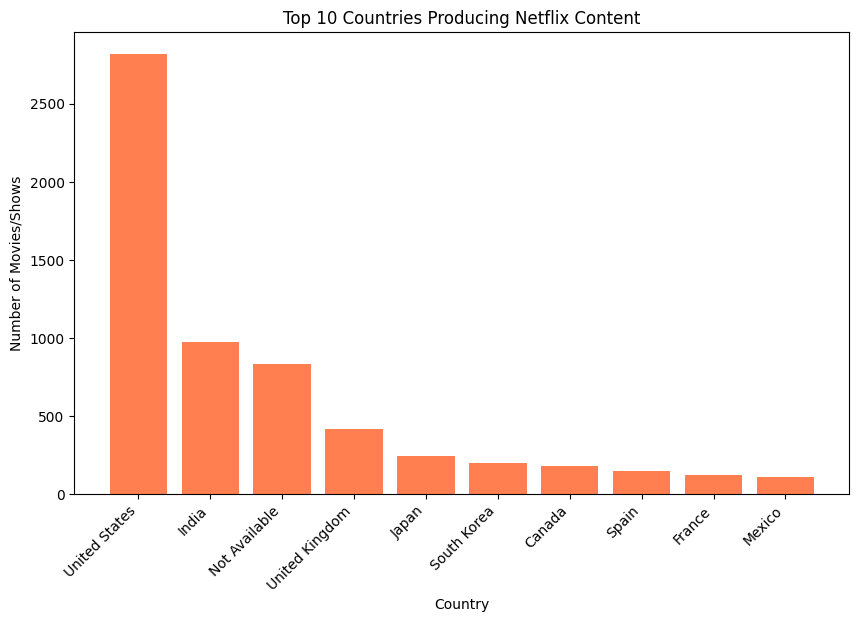

In [54]:
#Bar charts → Top genres, countries
# Top 10 countries with most Netflix content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(top_countries.index, top_countries.values, color="coral")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Movies/Shows")
plt.show()

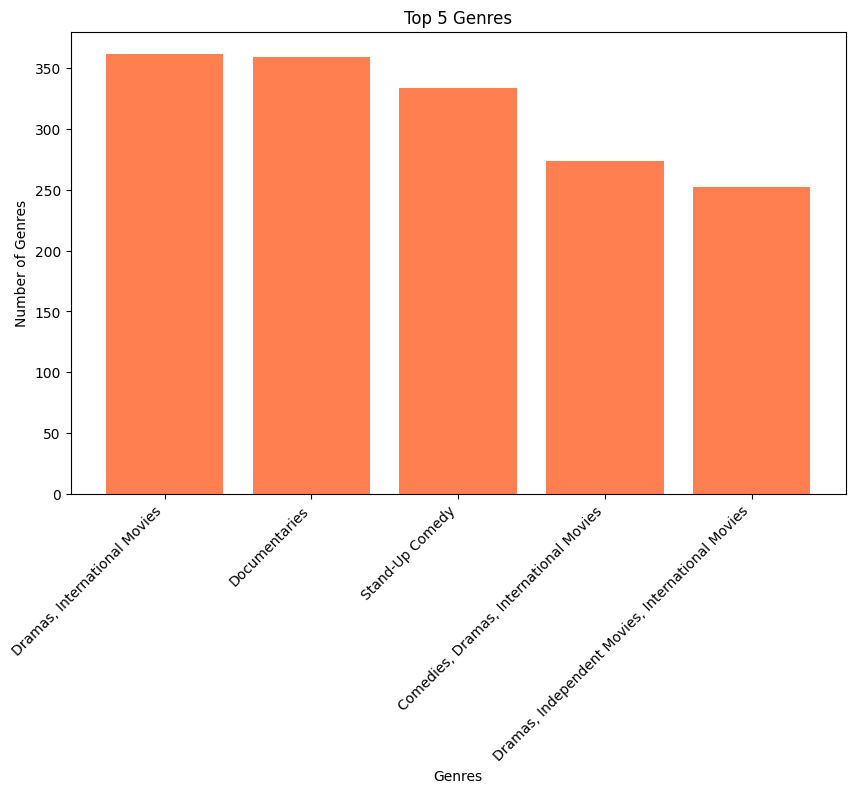

In [55]:
top_countries = df['listed_in'].value_counts().head(5)

plt.figure(figsize=(10,6))
plt.bar(top_countries.index, top_countries.values, color="coral")
plt.xticks(rotation=45, ha="right")
plt.title("Top 5 Genres")
plt.xlabel("Genres")
plt.ylabel("Number of Genres")
plt.show()

release_year
1925    1
1942    2
1943    3
1944    3
1945    4
Name: count, dtype: int64


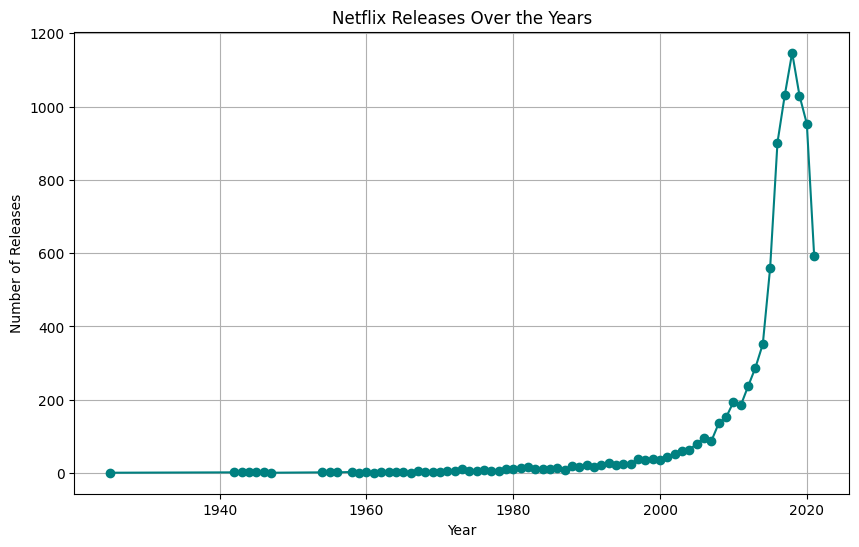

In [61]:
releases_per_year = df['release_year'].value_counts().sort_index()
print(releases_per_year.head())

plt.figure(figsize=(10,6))
plt.plot(releases_per_year.index, releases_per_year.values, marker='o', color='teal')
plt.title("Netflix Releases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()


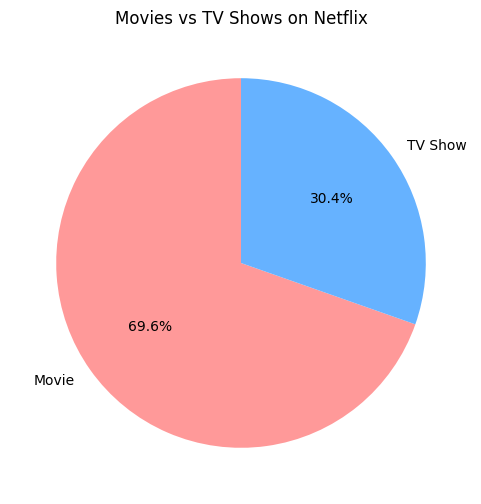

In [62]:
# Count movies vs TV shows
type_counts = df['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#FF9999','#66B2FF'], startangle=90)
plt.title("Movies vs TV Shows on Netflix")
plt.show()